<center>
<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/AB.jpeg?raw=true" height="200"> 

# Андан на экономе: домашнее задание 4 
## Проверка гипотез и А/Б-тестирование
</center>


**ФИО**: Мурадханова Полина Раджабалиевна

**id из контеста:** dap_econ_2022_338


## Общая информация


__Дата выдачи:__ 17.05.2023

__Мягкий дедлайн:__ 23:59MSK 09.06.2023

__Жесткий дедлайн:__ 23:59MSK 16.06.2023

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. 

> Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

> Фиксируйте все seed'ы, random_state'ы и тд - ваш код должен быть воспроизводим с теми же результатами.

## Формат сдачи

Сам ноутбук называйте в формате hw-04-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

## Импорт необходимых библиотек 

Импортируйте все используемые библиотеки здесь.

In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

In [2]:
# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8, 4)

# Часть 1: Процедура проверки гипотез

Для начала повторим теорию проверки гипотез и поотвечаем на различные вопросы. 

> Ниже вас ждут несколько примеров гипотез, на которые вам нужно получить статистически значимые ответы. Вы можете пользоваться встроенными функциями тестов, можете писать свои, а можете использовать с семинаров – это не влияет на полученные баллы. Вы также оставляете за собой право выбрать, проверять гипотезу через `p-value` или по критическим точкам или вообще по доверительным интервалам (но здесь будьте осторожнее, особенно, когда у вас 2 выборки). 

__Здесь важно:__

- Правильно посчитать `p-value` либо наблюдаемое значение критерия (либо дов. интервал);
- Правильно сделать вывод об отвержении / не отвержении нулевой гипотезы;
- Правильно выбрать тест для проверки и обосновать, почему вы выбрали именно его.

Гипотезы проверяйте на $5\%$ уровне значимости

## Задача №1: Экзамен

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/exam.jpeg?raw=true" width="400" align='left'>

У вас есть набор данных об оценках студентов на экзамене. Каждая строка в датасете – отдельный студент. Датасет представляет собой следующие колонки:

* `gender` – пол
* `race/ethnicity` – раса / этническая принадлежность
* `parental level of education` – уровень образования
* `lunch` – получает ли бесплатные обеды (тип питания)
* `test preparation course` – прошел ли курсы по подготовке к тесту
* `math score` – баллы за математику
* `reading score` – баллы за чтение
* `writing score` – баллы за письменность

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/hw/hw04/data/students_exam.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


__а)__ __[5 баллов]__  Проверьте гипотезу о том, что студенты, получившие высшее образование (associate's degree, bachelor's degree, master's degree) в среднем пишут математику на большее число баллов, чем студенты со средним образованием (high school, some high school, some college). 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{high} = \mu_{middle} \\
& H_1: \mu_{high} > \mu_{middle}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: студенты с высшим образованием и со средним. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

In [5]:

high = df[df.loc[:,"parental level of education"].isin(["associate's degree" , "bachelor's degree" , "master's degree"])]
middle =  df[df.loc[:,"parental level of education"].isin(["high school", "some high school", "some college"])]
high_m_score=high['math score']
middle_m_score = middle['math score']
alpha = 0.05 

diff = high_m_score.mean() - middle_m_score.mean() 
diff_std = np.sqrt(high_m_score.var(ddof=1)/high_m_score.size + middle_m_score.var(ddof=1)/middle_m_score.size)
z_obs = diff/diff_std
z_crit = sts.norm.ppf(1 - alpha) #односторонняя
print(f'Наблюдаемое значение {z_obs:.5} больше критического {z_crit:.3} => нулевая гипотеза  отвергается')


Наблюдаемое значение 4.309 больше критического 1.64 => нулевая гипотеза  отвергается


In [6]:
#точный тест, если мы предполагаем, что неизвестные дисперсии равны - видим, что чиселки почти такие же, результат идентичный - гипотеза отвергается
from statsmodels.stats.weightstats import ttest_ind

t_obs, p_val, _ = ttest_ind(high_m_score, middle_m_score, value=0, alternative='larger')
t_crit = sts.t(df = high_m_score.size + middle_m_score.size - 2).ppf(1 - alpha)
print(f'Наблюдаемое значение {t_obs:.5} больше критического {t_crit:.3} => нулевая гипотеза  отвергается')

Наблюдаемое значение 4.3111 больше критического 1.65 => нулевая гипотеза  отвергается


__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Нашла доверительный интервал. Гипотеза правосторонняя, поэтому сравниваем с положительной z_crit. Расчетное значение в ДИ не попадает - нулевая гипотеза выполняется. Использовала асимптотический z-test, основанный на ЦПТ. Чтоб его использовать, размер выборки должен быть большим (у нас все ок), данные должны прийти из нормального распределения, стандартное отклонение должно быть известно.

__б)__ __[5 баллов]__  Правда ли что в среднем студенты пишут экзамен по `reading` так же, как и по `math`? 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{math} = \mu_{reading} \\
& H_1: \mu_{math} \neq \mu_{reading}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: баллы по чтению и баллы по математике. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

In [7]:
m_score = df['math score']
r_score = df['reading score']
alpha = 0.05 

diff_2 = m_score.mean() - r_score.mean() #чекнуть
diff_std_2 = np.sqrt(m_score.var(ddof=1)/m_score.size + r_score.var(ddof=1)/r_score.size)
z_obs_2 = diff_2/diff_std_2
z_crit_2 = -sts.norm.ppf(1 - alpha/2) 
print(f'Наблюдаемое значение {z_obs_2:.5} меньше критического {z_crit_2:.3} => нулевая гипотеза  отвергается')


Наблюдаемое значение -4.6271 меньше критического -1.96 => нулевая гипотеза  отвергается


In [8]:
from statsmodels.stats.weightstats import ttest_ind

t_obs, p_val, _ = ttest_ind(m_score, r_score, value=0, alternative='two-sided')
t_crit = sts.t(df = m_score.size + m_score.size - 2).ppf(alpha/2)
print(f'Наблюдаемое значение {t_obs:.5} больше критического {t_crit:.3} => нулевая гипотеза  отвергается')

Наблюдаемое значение -4.6271 больше критического -1.96 => нулевая гипотеза  отвергается


__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Провела и z-test асимптотический, и точный t-test. Для z-testa предпосылки - все те, что были выше. t-test используется тогда, когда мало данных, или когда предполагается, что дисперсии неизвестны, но равны

## Задача №2:  О мышах и людях

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/vagon.jpeg?raw=true" width="400" align='left'>

Для изучения аспектов процесса принятия моральных решений психологи уже много лет используют этические дилеммы, с помощью которых оценивают действия людей в гипотетических ситуациях. Один из самых известных примеров — это [проблема вагонетки,](https://ru.wikipedia.org/wiki/Проблема_вагонетки) в которой необходимо принять решение о том, стоит ли пожертвовать одним человеком для спасения пятерых.

Бельгийские психологи воплотили дилемму в реальную жизнь. Участники эксперимента должны были выбрать, ударить током пять мышей или одну мышь. Эксперимент проходил следующим образом. Участника сажали перед двумя клетками, в одной из которых сидели пять мышей, а в другой — одна. Перед клетками стоял ноутбук с $20$-секундным таймером: участникам сообщили, что по истечении этих $20$ секунд в клетку с пятью мышами пустят ток, и мыши получат не смертельный, но очень болезненный удар. Пока время идет, участник может нажать на кнопку: в этом случае ток пустят по клетке с одной мышью. В исследовании использовали живых мышей. 

Удары тока были ненастоящими: сразу же после «удара» участников сопроводили в отдельную комнату, где разъяснили им, что мыши в полном порядке и током их не били (об этом заранее догадались только $12$ участников). В решении реальной проблемы вагонетки приняли участие $192$ человека, а еще $83$ решали такую же задачку, но гипотетическую (на бумаге). Все участники также прошли онлайн-опросы, в ходе которых учёные собрали о респондентах кучу дополнительной информации. 

В файле `mouse.csv` лежит информация о том, как прошёл эксперимент. Нас будут интересовать столбцы: 

* __STUDY:__ какую проблему вагонетки решал человек $1$, если на бумаге и $2$, если реальную
* __AGE:__ возраст респондента 
* __GENDER:__ пол респондента
* __DECISION:__ решение дилеммы ($1$ - жать на кнопу, $0$ - не жать) 
* __RT:__ время, которое респондент потратил, чтобы нажать на кнопку 

Подробное описание данных, сами данные и даже код на R, использованный при оценивании моделей, можно найти в [репозитории исследования.](https://osf.io/kvb99/) В статье авторы строили несколько логистических регрессий, чтобы очистить эффект от психологических особенностей респондентов. Про подобные приёмы очистки мы немного поговорим позже.  Также более подробно про исследование [можно почитать на N + 1.](https://nplus1.ru/news/2018/05/11/mice-trolley)

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/hw/hw04/data/mouse.csv', sep='\t')

# отбираем нужные колонки
df = df[['STUDY', 'AGE', 'GENDER', 'DECISION', 'RT']]

# удаляем пропуски по колонке DECISION (то есть тех, кто не смог принять решение)
df = df[~df.DECISION.isnull()]
df

,STUDY,AGE,GENDER,DECISION,RT
3,1,21,0,1.0,9.212427
4,1,20,0,1.0,17.071711
5,1,21,1,1.0,9.827884
6,1,23,1,1.0,10.143030
7,1,20,1,1.0,7.447534
...,...,...,...,...,...
286,2,20,1,1.0,NaN
287,2,21,1,1.0,NaN
288,2,19,0,0.0,NaN
289,2,21,0,1.0,NaN


__а)__ __[5 баллов]__ Попытаемся ответить на тот же вопрос, что и исследователи. В какой из двух ситуаций респонденты чаще принимают решение нажать кнопку: в реальной или на бумаге?

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} p_1 = p_2 \hspace{2mm} \text{(На бумаге и в реальности жмут на кнопку одинаково часто)} \\
&H_1: \hspace{2mm} p_1 > p_2  \hspace{2mm} \text{(На бумаге на кнопку жмут чаще)}
\end{aligned}
$$

In [10]:
paper = df[df.STUDY==1]
real = df[df.STUDY==2]
paper_dec = paper.DECISION
real_dec = real.DECISION


In [11]:
alpha = 0.05                                       
n1,n2 = paper_dec.size, real_dec.size                      
diff = paper_dec.mean() - real_dec.mean()                                       
P = (paper_dec.sum() + real_dec.sum())/(n1 + n2)           
diff_std = np.sqrt(P*(1 - P)*(1/n1 + 1/n2))       
z_obs = diff/diff_std                              
z_crit = sts.norm.ppf(1 - alpha)               

print(f'{z_obs:.3} не попадает в ({-z_crit:.3} , {z_crit:.3}) => Нулевая гипотеза отвергается')


2.38 не попадает в (-1.64 , 1.64) => Нулевая гипотеза отвергается


In [12]:
def asy_mean_test(mean_hat, std_hat, mu_0=0,  #из сема полностью
                   alpha=0.05, alternative='two-sided', margin=3):
    """
        Асимптотический тест для равенства средних
    """
    
    z_obs = (mean_hat - mu_0)/std_hat
    
    if alternative == 'two-sided':
        p_value = 2 * (1 - sts.norm().cdf(np.abs(z_obs)))
        z_crit = sts.norm().ppf(1 - alpha/2)
        
        statistics = ['-z_crit', 'z_crit', '-z_obs', 'z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                       (z_crit, 0.05, z_crit, margin, 'b'),
                                       (-z_obs, -0.6, -margin, -z_obs, 'r'), 
                                       (z_obs, 0.1, z_obs, margin, 'r')]))
    
    if alternative == 'less':
        p_value = sts.norm().cdf(z_obs)
        z_crit = sts.norm().ppf(1 - alpha)
        
        statistics = ['-z_crit', '-z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                       (-z_obs, -0.6, -margin, -z_obs, 'r')]))

    if alternative == 'larger':
        p_value = 1 - sts.norm().cdf(z_obs)
        z_crit = sts.norm().ppf(1 - alpha)
        
        statistics = ['z_crit', 'z_obs']
        params = dict(zip(statistics, [(z_crit, 0.05, z_crit, margin, 'b'),
                                       (z_obs, 0.1, z_obs, margin, 'r')]))
    
    
    plt.figure(figsize = (8, 4))
    x = np.linspace(-margin, margin)
    pdf = sts.norm().pdf(x)

    plt.plot(x, pdf, color="black")
    plt.ylabel("$f(x)$", fontsize=16)
    plt.xlabel("$x$", fontsize=16)
    y_max = plt.ylim()[1]
    
    for i in range(len(statistics)):
        statistic, text_margin, left_bound, right_bound, color = params[statistics[i]]
        
        plt.axvline(statistic, color=color, linestyle="--", lw=2)
        h = 0.8 if statistics[i].split('_')[-1] == 'crit' else 0.6
        plt.text(statistic + text_margin, 
                 h*y_max, round(statistic, 2), color=color, fontsize=16)
        
        xq = np.linspace(left_bound, right_bound)
        yq = sts.norm().pdf(xq)
        plt.fill_between(xq, 0, yq, color=color, alpha=0.2)
    
    return p_value

Значение p-val 0.008701077805778001 меньше 0.05 -> нулевая гипотеза отвергается


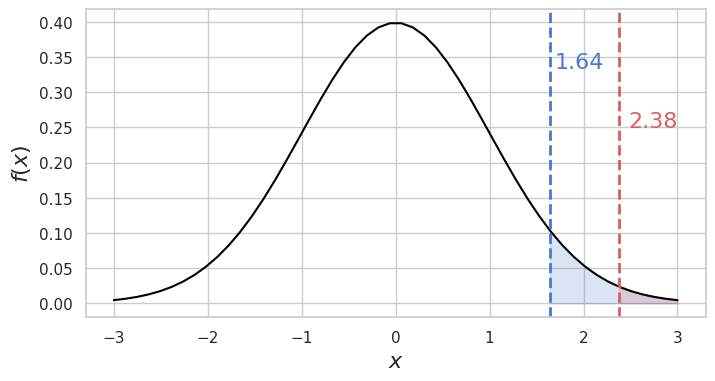

In [15]:
ans= asy_mean_test(diff, diff_std, mu_0=0, alpha=0.05, alternative='larger')
print(f'Значение p-val {ans} меньше {alpha} -> нулевая гипотеза отвергается') #тот же результат, полученный путем сравнения п-значения и уровня значимости

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Все про асимптотический z-test остается неизменным - здесь данных меньше, но достаточно, чтобы его использовать.
При использовании функции результат остался тем же: значение p-value, равное 0.008701077805778001 меньше уровня значимости = 0.05. Следовательно, нулевая гипотеза отвергается.

__б)__ __[5 баллов]__  Кровожадные люди быстро берут на себя ответственность за удар мышки током. Будем считать, что кровожадные люди принимают решение менее, чем за пять секунд. Правда ли, что люди по своей природе кровожадные? 

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu \le 5 \hspace{2mm} \text{(Люди кровожадны)} \\
&H_1: \hspace{2mm} \mu > 5  \hspace{2mm} \text{(Люди не кровожадны)}
\end{aligned}
$$

In [16]:

from statsmodels.stats.weightstats import ztest
z_r = ztest(df.RT.dropna() , value=5, alternative='larger')[0] #нашла расчетное значение, удалив строки, где нет инфы в столбце RT
print(f'Наблюдаемое значение {z_r} больше критического {sts.norm.ppf(1 - alpha) } => нулевая гипотеза отвергается')


Наблюдаемое значение 12.974895950977869 больше критического 1.6448536269514722 => нулевая гипотеза отвергается


__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ все предпосылки про z-test остаются теми же (мы предполагаем, что данные пришли из нормального распределения, случайные величины независимо и одинаково распределены, их количества достаточно, чтобы использовать тест)

## Задача №3:  Парадокс

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/simpson.jpg?raw=true" width="350" align='left'>

Помимо решения задач и применения различных функций из библиотек необходимо очень аккуратно работать с данным и понимать, какие действия корректны, а какие нет. Перед вами результаты медицинских исследований: 

- из $1650$ мужчин, принимавших лекарство, выздоровели $770$, 
- из $223$ мужчин, не принимавших лекарство, выздоровели $88$,
- из $245$ женщин, принимавших лекарство, выздоровели $165$,
- из $750$ женщин, не принимавших лекарство женщин, выздоровели $440$.

Необходимо найти ответы на следующие вопросы: 

1. Влияет ли лекарство на мужчин?
2. Влияет ли лекарство на женщин? 
3. Влияет ли лекарство на людей обоих полов в целом?

Будем считать, что исследование проводилось методом двойного слепого тестирования. Врач не знал, даёт ли он пациенту плацебо или лекарство, пациент не знал, пьёт ли он плацебо или лекарство. 

Запишем данные в табличку. Пусть $A$ — принимавшие лекарство, $\overline{A}$ — не принимавшие лекарство, $B$ — выздоровевшие, $\overline{B}$ — не выздоровевшие.

<!--<img width="60%" src="pics/pic2.png">-->
<table>
<tr><td>
    
|Мужчины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 770 | 880 |
|$\overline{A}$| 88 | 135 |

</td><td>
    
|Женщины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 165 | 80 |
|$\overline{A}$| 440 | 310 |

</td><td>

|Вместе| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 935 | 960 |
|$\overline{A}$| 528 | 445 |

</td></tr> </table>

Для решения задачи воспользуйтесь критерием хи-квадрат Пирсона. Мы его не разбирали на семинарах, однако на курсе матстата он у вас был. Вспомнить как он работает можно [в этом видео.](https://www.youtube.com/watch?v=bws1CB9XZ6E&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=10) Посмотреть на код можно [в этом видео.](https://www.youtube.com/watch?v=H3NtBN_o-hk&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=12) Тетрадку с кодом можно [найти тут.](https://github.com/FUlyankin/matstat-AB/blob/main/week10_nonparam_bootstrap/04_05_python_kolmogorov_pearson.ipynb)

Тест поможет нам понять, есть ли у лекарства какой-то эффект. Применить тест в python помогает функция `chi2_contingency` из пакета `scipy.stats`. Используйте её с параметром `correction=False`.

__а)__ __[5 баллов]__ Давайте попробуем найти ответ на вопрос, есть ли эффект от лекарства для мужчин? 

Давайте предварительно посчитаем долю выздровевших мужчин, которые принимали лекарство и долю выздровевших мужчин, которые не принимали лекартсво. Сравните эти доли.

In [30]:
took = 770/(770+880)
didnottake = 88/(88+135)
took, didnottake
#больше мужчин, которые принимали лекарство и выздоровели, чем тех, кто не принимал и выздоровел

(0.4666666666666667, 0.39461883408071746)

Создадим матрицу размера $2 \times 2.$ Внесём в неё частоты, полученные для мужчин.

In [18]:
men = np.array([[770,880],[88,135]])
men

array([[770, 880],
       [ 88, 135]])

Примените тест с параметром `correction=False` и сделайте выводы на уровне значимости $5\%.$

In [35]:
from scipy.stats import chi2_contingency
chi2, pvalue, k, _ = chi2_contingency(men, correction=False)
print(chi2, pvalue, k)
# p-val меньше уровня значимости, значит есть существенные значимые различия между теоретическими частотами и фактическими результатами в выборке

4.107854906463222 0.04268446899604581 1


__б)__ __[10 баллов]__ Сделайте всё то же самое, но руками, без помощи библиотеки.

Для того, чтобы расчитать тестовую стаститику хи-квадрат, нам необходимо найти матрицу ожидаемых частот, такую же, которая у нас получилась в предыдущем пункте в output-е функции `chi2_contingency`. 

Используя матрицу из предыдущего пункта, посчитайте общее количество испытуемых мужчин.

In [21]:
all_men = men.sum()
all_men

1873

Посчитайте отдельно количество испытуемых мужчин, которые принимали лекарство, и которые не принимали его $(n1, n2)$

In [22]:
n1 = men[0,:].sum()
n2 = men[1,:].sum()


Найдите вероятности выздороветь или нет (независимо от группы по приему/не приему лекарства), то есть вероятность попасть в $B$ и $\overline{B}$ для мужчин.

In [23]:
got_in_b = men[:,0].sum()/all_men
didnot_get_in_b =men[:,1].sum() /all_men
print(f'Вероятность выздороветь вне зависимости от группы приема/не приема равняется {got_in_b }')
print(f'Вероятность не выздороветь вне зависимости от группы приема/не приема равняется {didnot_get_in_b }')


Вероятность выздороветь вне зависимости от группы приема/не приема равняется 0.4580886278697277
Вероятность не выздороветь вне зависимости от группы приема/не приема равняется 0.5419113721302723


Расчитайте ожидаемые (теоритические) значения для каждой ячейки матрицы. Для этого перемножьте вероятности из предыдущего пункта со значениями $n_1$ и $n_2$. Полученную матрицу можно сравнить с выводом библиотеки`scipy.stats`, она должна быть идентичной.

In [27]:
new = np.array([[got_in_b*n1, didnot_get_in_b*n1],[got_in_b*n2, didnot_get_in_b*n2]])
chi2, pvalue, k, _ = chi2_contingency(new, correction=False)
print(chi2, pvalue, k)
print(chi2_contingency(new, correction=False)) 
print(new) 
#значение статистики = 0 , а p-val = 1, значит получены теоретические значения матрицы

0.0 1.0 1
Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[755.84623599, 894.15376401],
       [102.15376401, 120.84623599]]))
[[755.84623599 894.15376401]
 [102.15376401 120.84623599]]


[link text](https://)Расчитайте наблюдаемую статистику и найдите `p_value` с помощью `sts.chi2.cdf` с параметром `df=1`.

\begin{equation*} \chi^2_d = \sum {\frac {(O-E)^2}{E}},\end{equation*}

где

- $E$ - наши ожидаемые частоты(матрица из предыдущего пукта),
- $O$ - наблюдаемы частоты(первоначальная матрица).

In [31]:
hi2 = 0
men_n = men.reshape(1, 4)
new_n = new.reshape(1,4)
for i in range(4):
  hi2 += (men_n[0,i] - new_n[0,i])**2/new_n[0,i]
print(hi2)
crit = sts.chi2.ppf(0.95, df=1)
print(crit)
p_val = 1-sts.chi2.cdf(hi2, df=1) 
print(p_val)

4.107854906463222
3.841458820694124
0.04268446899604583


__в)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для женщин? (повторите процедуру пункта а) 

Как и в предыдущий раз, для начала, посчитайте долю выздровевших женщин, которые принимали лекарство и долю выздровевших женщин, которые не принимали лекартсво. Сравните эти доли.

In [32]:
took_w = 165/(165+80)
didnottake_w = 440/(440+310)
took_w, didnottake_w
#больше женщин, которые принимали лекарство и выздоровели, чем тех, кто не принимал и выздоровел

(0.673469387755102, 0.5866666666666667)

Создайте матрицу с данными из таблицы по женщинам, примените тест с параметром `correction=False` и сделайте выводы на уровене значимости $5\%$.

In [34]:
women = np.array([[165,80],[440,310]])
from scipy.stats import chi2_contingency
chi2, pvalue, k, _ = chi2_contingency(women, correction=False)
print(chi2, pvalue, k)
# p-val меньше уровня значимости, значит есть существенные значимые различия между теоретическими частотами и фактическими результатами в выборке
#причем здесь p-val меньше, чем p-val мужчин

5.838444095586957 0.015679686056826774 1


__г)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для объединенной группы?

Соотносится ли это с результатами по группам мужчин и женщин, взятых отдельно?

In [36]:
took_all = 935/(935+960)
didnottake_all = 528/(528+445)
took_all, didnottake_all
# парадокс выполняется:  в отедльных демографических группах выполняется закономерность (доля выздоравливающих людей, принимающих лекарство, больше количества выздоравливающих и не принимающих лекарство)
# а при объединении групп результаты получились обратными (теперь доля выздоравливающих людей, не принимающих лекарства, больше, чем количество выздоравливающих людей, принимающих лекарство )

(0.49340369393139843, 0.5426515930113053)

## Что произошло?

Если вы все сделали правильно, скорее всего у вас получились противоречивые значимые результаты. Давайте разберемся почему это так.

Может произойти такая ситуация, что новое лекарство может оказаться эффективным в каждом из отдельных исследований, на каждой отдельной группе, но объединение результатов укажет на то, что это лекарство либо бесполезно, либо вредно. [Это называется __парадокс Симпсона.__](https://ru.wikipedia.org/wiki/Парадокс_Симпсона) Он довольно часто встречается на практике в разном виде. 

Проблема здесь в том, что объединять эти выборки просто слив данные вместе — нельзя. Контрольные группы людей, не принимавших лекарство, занимают разный объем от выборок — примерно 12% в случае мужчин и 75% в случае женщин.

# Часть 2: А/Б-тестирование

## Задача №4: Не подглядывать!

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/trump.png?raw=true" width="500" align='left'>

На американских выборах 2020 года в некоторых штатах проходила очень конкурентная борьба между кандидатами. По мере подсчета голосов перевес в голосах склонялся то в пользу демократов, то в пользу республиканцев. И вот, в один из таких моментов, когда чаша весов склонилась в пользу республиканцев, Д. Трамп написал в твиттер "stop the count!", что означало призыв к остановке подсчета голосов. 

_Здесь у вас мог возникнуть вопрос, и зачем нам это?_ 

Ответ очень прост. В этой ситуации всем очевидно, что призыв Трампа не мог быть осуществлен, то есть прерывать подсчет голосов раньше времени кажется довольно глупым способом выявления победителя. И вот абсолютно такой же способ принятия решения есть и в А/Б-тестах, только теперь многим аналитикам он уже кажется не столь очевидным, что приводит к существенным ошибкам в заключении выводов. 

_Решив эту задачу, мы познакомимся с такой проблемой подробнее и поймем, как не стоит делать, когда вы запускаете А/Б-тест._

Чтобы понять, в чем же именно заключается проблема, мы с вами будем проводить симуляции А/Б-тестов. Это когда мы генерируем данные уже со знаниями, как эти данные устроены. А затем, запуская процедуру проверки гипотез над такими симулированными данными, мы будем оценивать, что происходит на практике (при запуске А/Б-теста).

На практике же всегда неизвестно, как устроены данные, и проводя А/Б-тест мы пытаемся зафиксировать различия. Еще раз, здесь же мы будем знать об устройстве данных, а затем будем смотреть на поведение А/Б-теста, то есть как будто бы смотреть на тест с обратной стороны. 

_Перед тем как идти дальше, остановитесь здесь и еще раз зафиксируйте это!_

__а) [10 баллов]  Подсчет размера выборки для А/Б-теста__

Предположим, что вы хотите провести А/Б-тест внутри вашего приложения. Вы выбрали некоторую метрику $X$ – случайную величину из нормального распределения с мат. ожиданием $100$ у.е. и стандартным отклонением $40$ у.е – это ваш бейзлайн (группа А). Рассчитайте, сколько дней вам нужно крутить такой А/Б-тест, если:

1. Вы ожидаете получить минимальный размер эффекта в $5$ у.е.;
2. Вы хотите зафиксировать ошибку первого рода на уровне $\alpha=5\%$, а ошибку второго рода на уровне $\beta=20\%$;
3. Вы точно знаете, что в группе Б стандартное отклонение метрики составляет также $20$ у.е.
4. Посещаемость вашего приложения ежедневно составляет $200$ пользователей, и вы готовы раскатить тест на $100\%$ трафика.

Формула для расчета числа наблюдений _для одной группы_:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

__Подсказка:__ Помните, что после получения общего числа наблюдений вам нужно выразить это в дни! Вы должны получить целое число. Также будьте аккуратны с подсчетом трафика и кол-ва наблюдений – обратите внимание, со скольким числом групп вы работаете!

In [68]:
def get_size(var_a, var_b, alpha, beta, mde):
    za = sts.norm.ppf(1 - alpha/2)
    zb = sts.norm.ppf(1 - beta)    
    n = ((var_a+var_b)*(za+zb)**2)/mde**2
    return int(np.ceil(n))

alpha = 0.05
beta = 0.2
mde = 5
amount=get_size(40**2, 40**2, alpha, beta, mde) #количество наблюдений для одной группы (то есть грубо говоря количество людей, которые должны быть в группе А и Б по отдельности, если я правильно поняла)
n=amount//100+1 #разделила на 100, так как в каждый день трафик составляет по 100 людей в каждой группе, и прибавила 1, так как иначе нам не хватит необходимых наблюдений для теста (однако нехватающих дней всего 5, мб и не стоило в большую сторону округлять)
print(f'Количество наблюдений для одной группы {amount}')
print(f'Количество дней, необходимых для проведения аб-теста {n}')

Количество наблюдений для одной группы 1005
Количество дней, необходимых для проведения аб-теста 11


__б) [25 баллов] Симуляция А/Б-теста__

Теперь нам нужно запустить А/Б-тест. Для этого:

1. Сгенерируйте выборку данных из нормального распределения для группы А и Б в конкретный один день. Считайте, что в группе Б математическое ожидание составляет $105$ у.е., то есть с учетом размера вашего минимального ожидаемого эффекта из предыдущего пункта.

In [69]:
np.random.seed(42)
a = np.random.normal(100, 40, 100) # один день для ста пользователей из одной группы
b = np.random.normal(105, 40, 100)
a,b

(array([119.86856612,  94.46942795, 125.90754152, 160.92119426,
         90.63386501,  90.63452172, 163.16851262, 130.69738917,
         81.22102456, 121.70240174,  81.46329229,  81.37080986,
        109.67849086,  23.46879021,  31.0032867 ,  77.50849883,
         59.48675519, 112.5698933 ,  63.67903698,  43.50785195,
        158.62595076,  90.96894798, 102.70112819,  43.01007255,
         78.22469102, 104.43690359,  53.9602569 , 115.02792073,
         75.9744524 ,  88.33225001,  75.93173551, 174.09112738,
         99.46011101,  57.69156284, 132.90179648,  51.166254  ,
        108.3545438 ,  21.61319504,  46.87255804, 107.87444943,
        129.5386632 , 106.85473125,  95.3740687 ,  87.95585218,
         40.85912039,  71.20623166,  81.57444916, 142.28488905,
        113.74473158,  29.47839379, 112.96335878,  84.59670878,
         72.92311999, 124.46705155, 141.2399809 , 137.25120476,
         66.43129907,  87.63150497, 113.25053726, 139.02180508,
         80.83303049,  92.57364093,  55.

2. Теперь представим, что наш тест был запущен $X$ дней. Напишите функцию, которая за этот период теста собирает в `DataFrame` следующие данные на каждый день теста: 
    1. среднее метрики в группе А
    2. среднее метрики в группе Б
    3. p-value, посчитанное с помощью t-test – можно воспользоваться встроенной функцией `scipy.stats.ttest_ind`
    
    Соберите `DataFrame` для $X=50$.
    
__Подсказка:__ Среднее для 1-го дня должно считаться по пользователям, пришедших в первый день, для второго дня – по пользователям, пришедшим в первый и второй день и т.д. То есть накопленным итогом за каждый день теста.

In [85]:
import pandas as pd
import numpy as np
from statistics import mean
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
np.random.seed(42)
def a_b_(x):
  df=pd.DataFrame(columns =['metric_a','metric_b', 'p-value'], index=range(0,x))
  r_a = np.random.normal(100, 40, 100)
  r_b = np.random.normal(105, 40, 100)
  df.iloc[0,0] =r_a.mean()
  df.iloc[0,1] =r_b.mean()

  df.iloc[0,2] =ttest_ind(r_a,r_b)[1]
  for i in range(1,x):
    a= np.random.normal(100, 40, 100)
    b = np.random.normal(105, 40, 100)
    r_a=np.append(r_a,a)
    r_b=np.append(r_b,b)
    df.iloc[i,0] =mean(r_a)
    df.iloc[i,1] =mean(r_b)
    df.iloc[i,2] =ttest_ind(r_a,r_b)[1]
  return df
new_df=a_b_(50)
new_df

,metric_a,metric_b,p-value
0,95.846139,105.892183,0.057952
1,99.220995,107.582894,0.030124
2,98.733937,105.184521,0.042775
3,99.291391,105.076785,0.038006
4,101.262306,105.284259,0.104932
5,102.119751,105.950827,0.093634
6,102.07782,105.615526,0.094209
7,103.140131,105.042851,0.338257
8,103.524417,105.316527,0.336429
9,102.975308,105.631424,0.133145


3. На основе `DataFrame` из предыдущего пункта постройте график динамики среднего в группе А и в группе Б по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится.

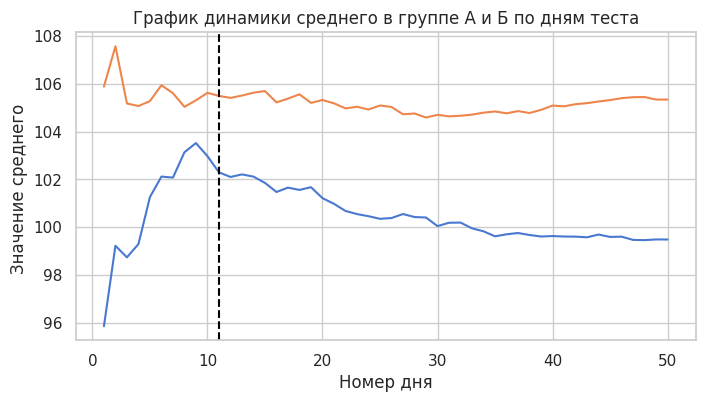

In [86]:
plt.plot(np.arange(1,51),new_df.metric_a)
plt.plot(np.arange(1,51),new_df.metric_b)
plt.xlabel('Номер дня')
plt.ylabel('Значение среднего ')
plt.title('График динамики среднего в группе А и Б по дням теста')
plt.axvline(x=n, color='black', linestyle = '--');

4. На основе `DataFrame` из предыдущего пункта постройте график динамики p-value по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится. Также отложите горизонтальную линию – ваш уровень значимости $\alpha$.

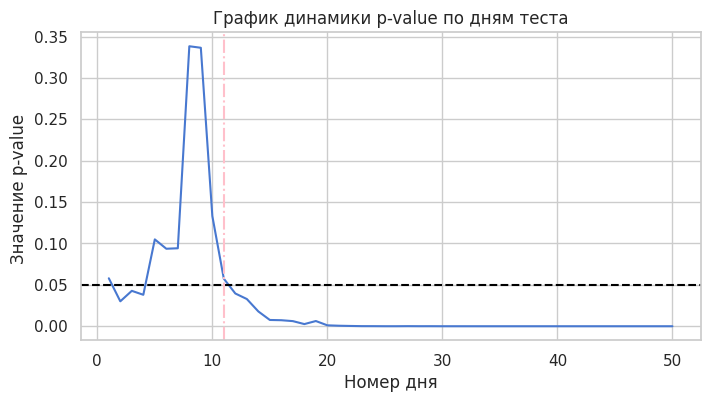

In [87]:
plt.plot(np.arange(1,51),new_df['p-value'])
plt.xlabel('Номер дня')
plt.ylabel('Значение p-value ')
plt.title('График динамики p-value по дням теста')
plt.axhline(y=0.05, color='black', linestyle = '--')
plt.axvline(x=n, color='pink', linestyle = '-.');

5. Перегенируруйте шаги 2-4 несколько раз, посмотрев на графики. Что вы видите? Что происходит с p-value в периодах:
    1. до кол-ва дней, посчитанных по формуле из п.1
    2. в точке кол-ва дней, посчитанных по формуле из п.1
    3. после кол-ва дней, посчитанных по формуле из п.1
    
    Опишите выводы максимально подробно.

In [88]:
#убрала зерно из пункта выше, перегенирировала несколько раз
#До n-ного дня p-val меняется очень сильно и вверх, и вниз, различия между выборками существенные, при таком количестве тестов результаты будут ненадежными
# (для моего зерна в н-ный день п-значение примерно равно уровню значимости, но такое будет не всегда)
#после н-ного дня колебания затухают, их амплитуда меньше 
# при всех генерациях к 50 дню п-значение равняется к нулю или принимает значение очень близкое к нулю


6. Теперь предположим, что мы поменяли наш $MDE$ до $1$ у.е. То есть мат. ожидание в группе А осталось по-прежнему $100$, а вот в группе Б теперь $101$. Перегенерируйте пункты 2-4 для измененного $MDE$, при этом кол-во дней в п.1 не пересчитывайте. Что происходит с p-value? Сделайте выводы.

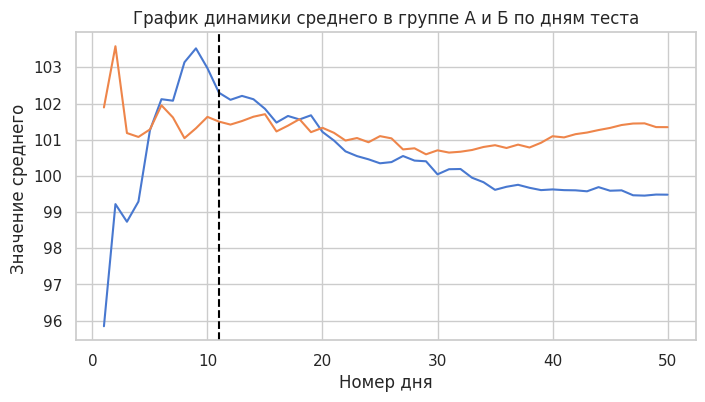

In [99]:
import pandas as pd
import numpy as np
from statistics import mean
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
np.random.seed(42)
def a_b_(x):
  df=pd.DataFrame(columns =['metric_a','metric_b', 'p-value'], index=range(0,x))
  r_a = np.random.normal(100, 40, 100)
  r_b = np.random.normal(101, 40, 100)
  df.iloc[0,0] =r_a.mean()
  df.iloc[0,1] =r_b.mean()

  df.iloc[0,2] =ttest_ind(r_a,r_b)[1]
  for i in range(1,x):
    a= np.random.normal(100, 40, 100)
    b = np.random.normal(101, 40, 100)
    r_a=np.append(r_a,a)
    r_b=np.append(r_b,b)
    df.iloc[i,0] =mean(r_a)
    df.iloc[i,1] =mean(r_b)
    df.iloc[i,2] =ttest_ind(r_a,r_b)[1]
  return df

new_df2=a_b_(50)
plt.plot(np.arange(1,51),new_df2.metric_a)
plt.plot(np.arange(1,51),new_df2.metric_b)
plt.xlabel('Номер дня')
plt.ylabel('Значение среднего ')
plt.title('График динамики среднего в группе А и Б по дням теста')
plt.axvline(x=n, color='black', linestyle = '--');

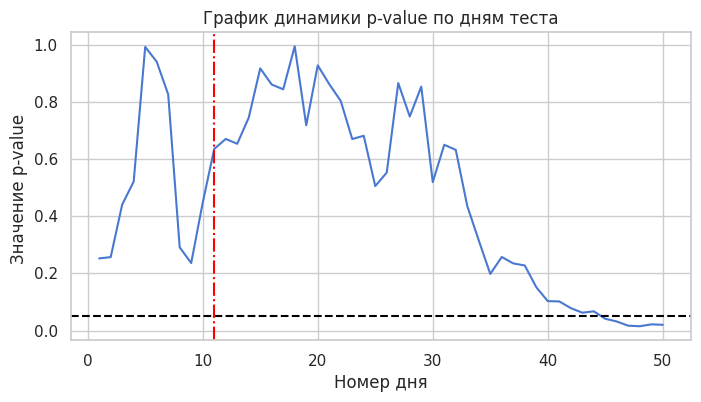

In [100]:
plt.plot(np.arange(1,51),new_df2['p-value'])
plt.xlabel('Номер дня')
plt.ylabel('Значение p-value ')
plt.title('График динамики p-value по дням теста')
plt.axhline(y=0.05, color='black', linestyle = '--')
plt.axvline(x=n, color='red', linestyle = '-.');
#для моего зерна получилось что п-вал к 50-ому дню стремится к нулю
#перегенирировала несколько раз выборки - п-вал вообще не факт что сходится к 0
#несколько раз получалось так, что в первые дни аб теста п-вал было близко к нулю, а к 50 дню - близко к 1
# посчитанное n в первом пункте здесь будет некорректным, надо пересчитать и получить новое нужно количество дней для аб теста

__с) [20баллов] Симуляция А/А-теста__

Теперь представим, что изменений на самом деле никаких нету, то есть мат. ожидание в обоих группах $100$, а $MDE = 0$

1. И снова перегенерируйте вышесделанные пункты 2-4. Что происходит с p-value? Может ли оно оказаться ниже уровня значимости? 

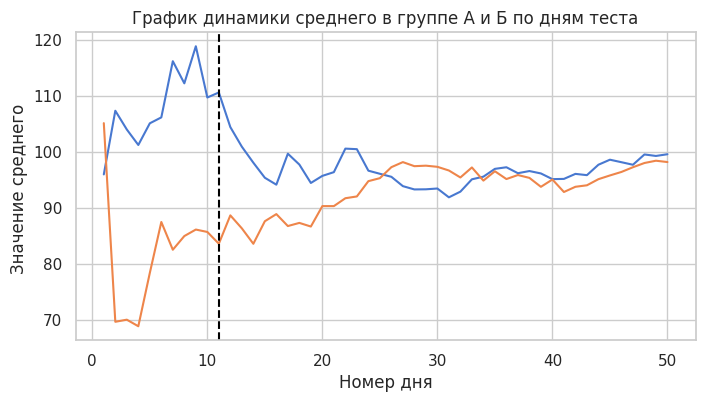

In [117]:
import pandas as pd
import numpy as np
from statistics import mean
from scipy.stats import ttest_ind

def a_b_(x):
  df=pd.DataFrame(columns =['metric_a','metric_b', 'p-value'], index=range(0,x))
  r_a = np.random.normal(100, 40, 100) #ежедневный трафик по 200 человек разделила на две одинаковые группы
  r_b = np.random.normal(100, 40, 100)
  df.iloc[0,0] =r_a.mean()
  df.iloc[0,1] =r_b.mean()
  df.iloc[0,2] =ttest_ind(r_a,r_b)[1]
  for i in range(1,x):
    a= np.random.normal(100, 40, 100)
    b = np.random.normal(100, 40, 100)
    r_a=np.append(r_a,a)
    r_b=np.append(r_b,b) 
    df.iloc[i,0] =(r_a[:(i+1)]).mean()
    df.iloc[i,1] =(r_b[:(i+1)]).mean()
    df.iloc[i,2] =ttest_ind(r_a,r_b)[1]
  return df
new_df3=a_b_(50)
plt.plot(np.arange(1,51),new_df3.metric_a)
plt.plot(np.arange(1,51),new_df3.metric_b)
plt.xlabel('Номер дня')
plt.ylabel('Значение среднего ')
plt.title('График динамики среднего в группе А и Б по дням теста')
plt.axvline(x=n, color='black', linestyle = '--');


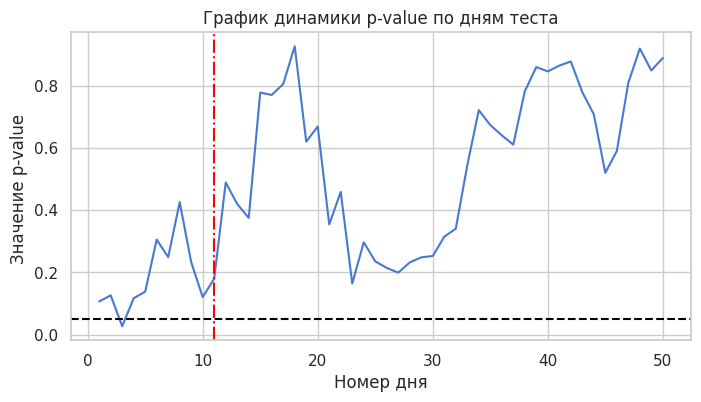

In [119]:
plt.plot(np.arange(1,51),new_df3['p-value']) #п-вал скачет вверх-вниз, может оказаться меньше 0 (случайность), но в целом принимает высокое значение, это хорошо, значит что результаты у а\а теста не сильно отличаются, победителя среди них нет, можно запускать аб-тест
plt.xlabel('Номер дня')
plt.ylabel('Значение p-value ')
plt.title('График динамики p-value по дням теста')
plt.axhline(y=0.05, color='black', linestyle = '--')
plt.axvline(x=n, color='red', linestyle = '-.');

2. Ну и напоследок, напишите функцию, которая генерирует p-value на последний день A/A теста. А затем запустите эту функцию $1000$ раз, собрав $1000$ значений p-value. Постройте гистограмму их распределения. Что вы видите? 

__Подсказка:__ Для такой функции достаточно создать выборку один раз, изменив ее размер.

In [120]:
np.random.seed(42)
def a_b_(x):
  p_val_list=[]
  for l in range(x):
    df=pd.DataFrame(columns =['metric_a','metric_b', 'p-value'], index=range(0,50))
    r_a = np.random.normal(100, 40, 100)
    r_b = np.random.normal(100, 40, 100)
    df.iloc[0,0] =r_a.mean()
    df.iloc[0,1] =r_b.mean()
    df.iloc[0,2] =ttest_ind(r_a,r_b)[1]
    for i in range(1,n):
      a= np.random.normal(100, 40, 100)
      b = np.random.normal(100, 40, 100)
      r_a=np.append(r_a,a)
      r_b=np.append(r_b,b) 
      df.iloc[i,0] =(r_a[:(i+1)]).mean()
      df.iloc[i,1] =(r_b[:(i+1)]).mean()
      df.iloc[i,2] =ttest_ind(r_a,r_b)[1]
    p_val_list.append(df.loc[n-1][2])
  return p_val_list
list_p_=a_b_(1000)


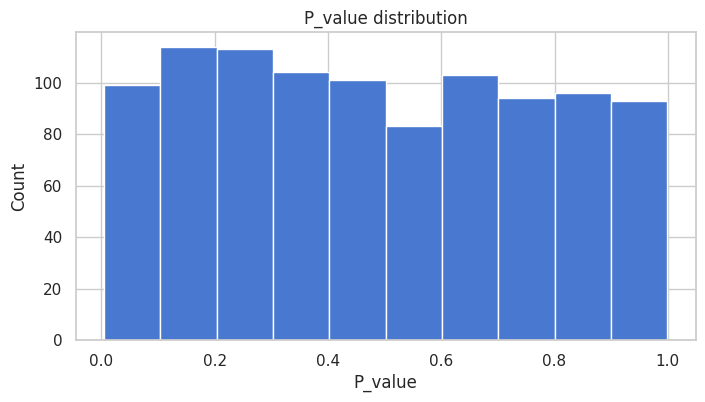

In [121]:
plt.title('P_value distribution')
plt.xlabel('P_value')
plt.ylabel('Count')
plt.hist(list_p_);
#распределение напоминает равномерное, это означает, что метрику можно использовать в эксперименте, так как нет зависимости между данными - начинать анализ можно